In [250]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', 100)
import math
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Load Data

In [251]:


df = pd.read_csv('train_clean.csv')
df = df.drop(df.columns[0], axis=1)
tf = pd.read_csv('test_clean.csv')
tf = tf.drop(tf.columns[0], axis=1)

In [252]:
y = df['SalesPrice']
X = df.drop('SalesPrice', axis=1)

In [253]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.3, random_state=123)

In [254]:
fea = X_train.columns

## Lasso

In [255]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -2, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

lasso_cv = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
lasso_cv.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 0.0001 ,  0.00012,  0.00014,  0.00016,  0.00019,  0.00022,
        0.00026,  0.0003 ,  0.00036,  0.00042,  0.00049,  0.00057,
        0.00067,  0.00079,  0.00092,  0.00108,  0.00127,  0.00149,
        0.00174,  0.00204,  0.0024 ,  0.00281,  0.00329,  0.00386,
        0.00452,  0.0053 ,  0.00621,  0.00728,  0.00853,  0.01   ])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=0)

In [256]:
lasso_cv.best_params_ 

{'alpha': 0.00041753189365604002}

In [257]:
lasso = Lasso(alpha=0.00041753189365604002)
y_ls_predicted= lasso.fit(X_train, y_train).predict(X_test)
y_lasso = lasso.fit(X_train, y_train).predict(tf)
sqrt(mean_squared_error(y_test, y_ls_predicted))

0.11831993242925741

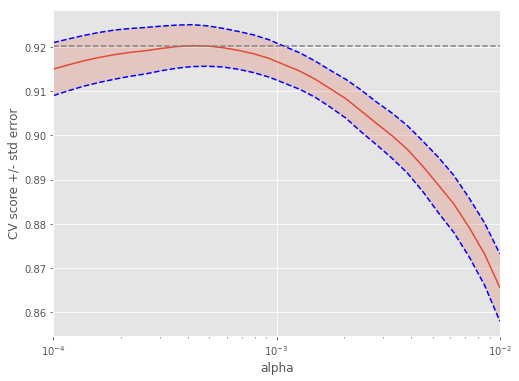

In [258]:
scores = lasso_cv.cv_results_['mean_test_score']
scores_std = lasso_cv.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

## Ridge

In [259]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge


rge = Ridge(random_state=0)
tuned_parameters1 = [{'alpha': np.logspace(-3, 3, 30)}]
n_folds = 5

rge_cv = GridSearchCV(rge, tuned_parameters1, cv=n_folds, refit=False)
rge_cv.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([  1.00000e-03,   1.61026e-03,   2.59294e-03,   4.17532e-03,
         6.72336e-03,   1.08264e-02,   1.74333e-02,   2.80722e-02,
         4.52035e-02,   7.27895e-02,   1.17210e-01,   1.88739e-01,
         3.03920e-01,   4.89390e-01,   7.88046e-01,   1.26896e+00,
         2...   9.23671e+01,   1.48735e+02,   2.39503e+02,   3.85662e+02,
         6.21017e+02,   1.00000e+03])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=0)

In [260]:
rge_cv.best_params_



{'alpha': 5.2983169062837074}

In [261]:
rge = Ridge(alpha=5.2983169062837074)
y_ls_predicted= rge.fit(X_train, y_train).predict(X_test)
y_ridge = rge.fit(X_train, y_train).predict(tf)
sqrt(mean_squared_error(y_test, y_ls_predicted))

0.12044312682160935

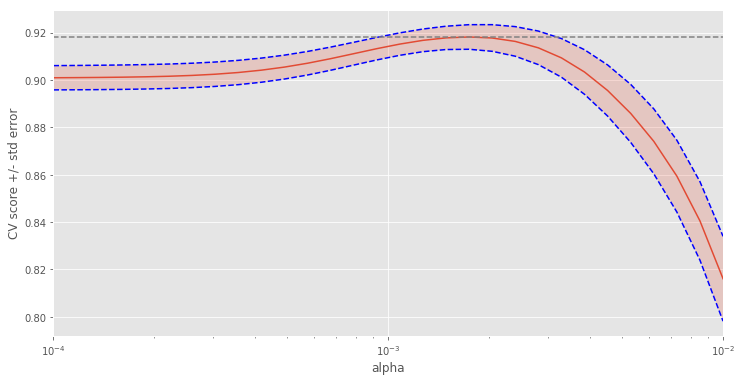

In [262]:
scores = rge_cv.cv_results_['mean_test_score']
scores_std = rge_cv.cv_results_['std_test_score']
plt.figure().set_size_inches(12, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

## Elastic Net

- Cross Validation
- predict
- calculate RMSE

In [234]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

regr = ElasticNetCV(cv=10, random_state=0)
regr.fit(X_train, y_train )
ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=2000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)




ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=2000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [ ]:
regr.l1_ratio_

In [ ]:
regr.alpha_

In [235]:

y_EN_predicted=(regr.fit(X_train, y_train).predict(X_test)) 
y_en= regr.predict(tf)

220

In [239]:
y_EN_predicted=(regr.predict(X_test)) 

In [240]:
print(regr.score(X_test,y_test)) 

0.90575393611


-Elastic Net RMSE


In [241]:
sqrt(mean_squared_error(y_test, y_EN_predicted))

0.11751129268678291

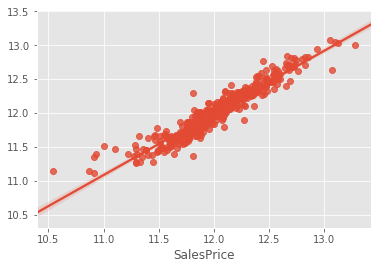

In [264]:
sns.regplot(y_test, y_EN_predicted)

## Random Forest 

### **Tune the parameter**

In [285]:
from sklearn.ensemble import RandomForestRegressor

rgr_dict = {}
for ne in [100,500,1000]:
    for md in [3,5,7,9]:
        for msl in [2,4,6,8]:
            for mss in [2,3,4,5]:
                
                rfr = RandomForestRegressor(n_estimators=ne, max_depth=md,min_samples_leaf =msl,
                                 random_state=0,max_features='auto',min_samples_split=mss)
                rfr.fit(X_train, y_train)
                scores = cross_val_score(rfr, X_train, y_train)
                rgr_dict[(ne, md,mss,scores.mean())]=sqrt(mean_squared_error(y_test, rfr.predict(X_test)))
                print(ne, md,mss, scores.mean(),
                      sqrt(mean_squared_error(y_test, rfr.predict(X_test)))) 



100 3 2 0.793857791353 0.1821371640602983
100 3 3 0.793857791353 0.1821371640602983
100 3 4 0.793857791353 0.1821371640602983
100 3 5 0.793857791353 0.1821371640602983
100 3 2 0.793826039845 0.18192719715159023
100 3 3 0.793826039845 0.18192719715159023
100 3 4 0.793826039845 0.18192719715159023
100 3 5 0.793826039845 0.18192719715159023
100 3 2 0.794659431702 0.18155077545232515
100 3 3 0.794659431702 0.18155077545232515
100 3 4 0.794659431702 0.18155077545232515
100 3 5 0.794659431702 0.18155077545232515
100 3 2 0.795986965618 0.1815056425628286
100 3 3 0.795986965618 0.1815056425628286
100 3 4 0.795986965618 0.1815056425628286
100 3 5 0.795986965618 0.1815056425628286
100 5 2 0.848676706778 0.15216446368522182
100 5 3 0.848676706778 0.15216446368522182
100 5 4 0.848676706778 0.15216446368522182
100 5 5 0.84893824987 0.15209990484711292
100 5 2 0.847921340053 0.15198907491784733
100 5 3 0.847921340053 0.15198907491784733
100 5 4 0.847921340053 0.15198907491784733
100 5 5 0.8479213400

KeyboardInterrupt: 

In [286]:
max(rgr_dict, key=rgr_dict.get)

(100, 3, 5, 0.79385779135288403)

In [287]:
rfr = RandomForestRegressor(random_state=0,min_samples_leaf =2,
                            n_estimators=1000, max_depth=10, max_features ='auto')
rfr_p = rfr.fit(X_train, y_train).predict(X_test)
sqrt(mean_squared_error(y_test, rfr_p))

0.13651477185951527

In [288]:
fea_dict ={}
fit_model = rfr.feature_importances_
feat_list= X_train.columns.tolist()
for i in range(len(feat_list)):
    fea_dict[feat_list[i]] = fit_model[i]

In [289]:
# sort dictionary and pick the highest 50
def sortdict(svm_dict,n):
    sorted_list= sorted(svm_dict.items(), key=lambda svm_dict: svm_dict[1], reverse=True)[:n]
    sorted_key = [item[0] for item in sorted_list]
    sorted_value  = [item[1] for item in sorted_list]
    return dict(zip(sorted_key, sorted_value + [None] * (len(sorted_key) - len(sorted_value))))


(0, 0.7)

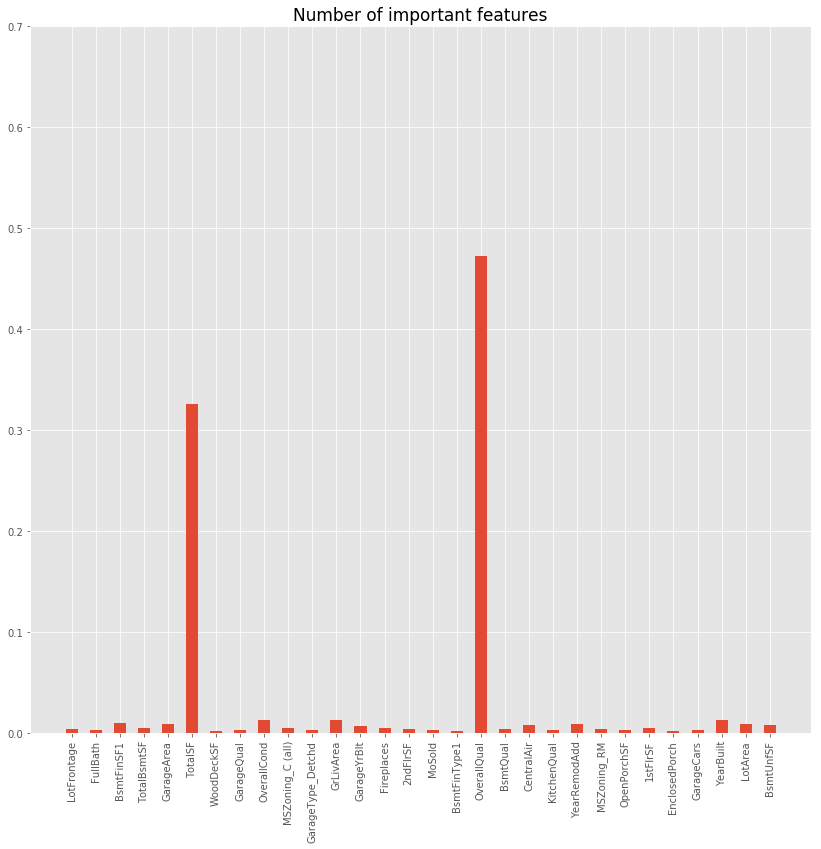

In [290]:
fea1= sortdict(fea_dict,30)
plt.figure(1, figsize=(14, 13))
plt.bar(np.arange(len(fea1)), fea1.values(), align='center', width=0.5)
plt.xticks(np.arange(len(fea1)), fea1.keys(),rotation='90') 
plt.title("Number of important features", fontsize=17)
plt.ylim(0, 0.7)

In [291]:
import operator


rfr_p2 = rfr.fit(X_train[pd.Index(fea1, dtype='object')], y_train).predict(X_test[pd.Index(fea1, dtype='object')])
y_rf=rfr.predict(tf[pd.Index(fea1, dtype='object')])
print(i, sqrt(mean_squared_error(y_test, rfr_p2)))

219 0.136341117805448


## Extreme Random Forest

**Use tuned parameters to plot**

In [292]:
from sklearn.ensemble import ExtraTreesRegressor
import operator

model = ExtraTreesRegressor(random_state=0,
                            n_estimators=400, max_depth=10, max_features ='auto')
erf_p = model.fit(X_train, y_train).predict(X_test)

sqrt(mean_squared_error(y_test, erf_p))

0.1307481852563675

### After tuning 

In [294]:
fea2_dict ={}
fi_model = model.feature_importances_
feat_l= X_train.columns.tolist()
for i in range(len(feat_l)):
    fea2_dict[feat_l[i]] = fi_model[i]

In [295]:
fea2= sortdict(fea2_dict,30)

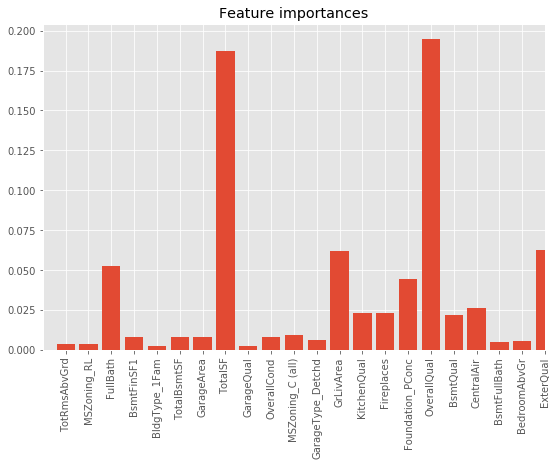

In [296]:
plt.figure(1, figsize=(9, 6))
plt.title("Feature importances")
plt.bar(range(len(fea2)), list(fea2.values()), align='center')
plt.xticks(range(len(fea2)), list(fea2.keys()),rotation='90')
plt.xlim([-1, 21])
plt.show()

In [297]:
from sklearn.ensemble import ExtraTreesRegressor
import operator

model = ExtraTreesRegressor(random_state=0,
                            n_estimators=400, max_depth=10, max_features ='auto')
erf_p = model.fit(X_train[pd.Index(fea, dtype='object')], y_train).predict(X_test[pd.Index(fea, dtype='object')])

sqrt(mean_squared_error(y_test, erf_p))

0.12926348676005164

In [298]:
y_etf = model.predict(tf[pd.Index(fea, dtype='object')])

for i in np.arange(5,60,1):
    sorted_dict=sortdict(svm_dict,i)
    X_svm = list(sorted_dict.keys())
    svr = svm.SVR(kernel='linear', C=1e1, gamma=0.1)
    svr.fit(X_train[pd.Index(X_svm, dtype='object')], y_train)
    CV_ft_count[i]=sqrt(mean_squared_error(y_test, svr.predict(X_test[pd.Index(X_svm, dtype='object')])))

    

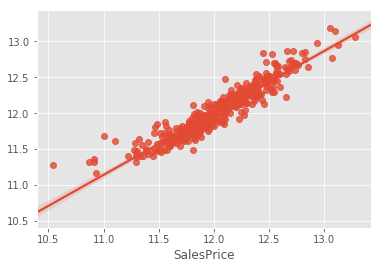

In [299]:
sns.regplot(y_test, erf_p)

## SVM

In [248]:
from sklearn import svm

from sklearn.model_selection import cross_val_score
svm_dict={}

### **result with 45 important features**

In [301]:

svr = svm.SVR(kernel='linear', C=1e0,gamma =0.01)
svr_fit=svr.fit(X_train[pd.Index(fea2, dtype='object')], y_train)
y_svr= svr.predict(tf[pd.Index(fea2, dtype='object')])
sqrt(mean_squared_error(y_test, svr.predict(X_test[pd.Index(fea2, dtype='object')])))

0.12388602412022454

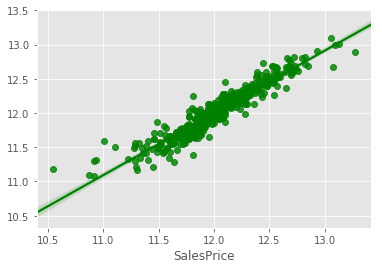

In [302]:
sns.regplot(y_test, svr.predict(X_test[pd.Index(fea2, dtype='object')]),color="g")

{'C=1e0,gamma =0.1' :0.12025334146220222, 'C=1e0,gamma =0.01': 0.12025334146220222
 'C=1e1,gamma =100':0.12165036670798601,'C=1e2,gamma =0.01':
 

#### **after tuned the best number of features**

svm_dict2={}
for i in np.arange(10,50):
    sorted_dict=sortdict(svm_dict,i)
    X_svm = list(sorted_dict.keys())
    svr = svm.SVR(kernel='linear', C=1e0,gamma =0.01).fit(X_train[pd.Index(X_svm, dtype='object')], y_train)
    svm_dict2[i]=sqrt(mean_squared_error(y_test, svr.predict(X_test[pd.Index(X_svm, dtype='object')])))
    

### **result with all important features**

In [305]:

svr_total = svm.SVR(kernel='linear', C=1e0,gamma =0.01).fit(X_train, y_train)
sqrt(mean_squared_error(y_test, svr_total.predict(X_test)))

0.13475430708861305

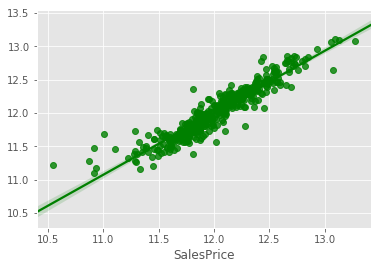

In [306]:
sns.regplot(y_test, svr_total.predict(X_test),color="g")

from sklearn.feature_selection import SelectFromModel

model_new = SelectFromModel(model, prefit=True)

X_new = model_new.transform(X_train)
model_new.get_params

### simple linear regressor

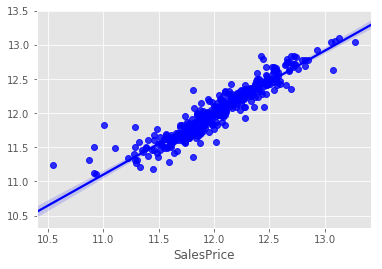

In [99]:

from statsmodels.regression.linear_model import RegressionResults

lm_1 = LinearRegression().fit(X_train, y_train).predict(X_test)
sns.regplot(y_test, lm_1,color="b")

In [ ]:
sqrt

In [100]:
print('Multi Linear Regression: ',sqrt(mean_squared_error(y_test, lm_1)))

Multi Linear Regression:  0.1339272298172961


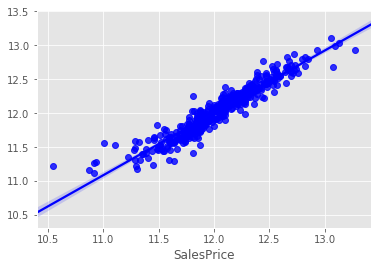

In [101]:
lm_2 = LinearRegression().fit(X_train[pd.Index(X_svm, dtype='object')]
                              , y_train).predict(X_test[pd.Index(X_svm, dtype='object')])
sns.regplot(y_test, lm_2,color="b")



In [102]:
print('Multi Linear Regression with selelcted variables: ',sqrt(mean_squared_error(y_test, lm_2)))

Multi Linear Regression with selelcted variables:  0.11864509269169725


## XGBoost

In [194]:
xg_dict={}
for md in np.arange(5,7,9):
    for lr in [0.05,0.08,0.09,0.1,0.12]:
        for g in [0.0001,0.001,0.01,0.05,0.09,0.1,0.2,0.3]:
            xg_reg = xgb.XGBRegressor(objective="reg:linear", gamma= g,learning_rate=lr,
                                       max_depth=md,seed=123)
            xg_reg.fit(X_train, y_train)
            preds = xg_reg.predict(X_test)
            xg_dict[(md,lr,g)]=sqrt(mean_squared_error(y_test, preds))
            print(md,lr,g,sqrt(mean_squared_error(y_test, preds)))



[0.11826391863181129]

### after tuning 

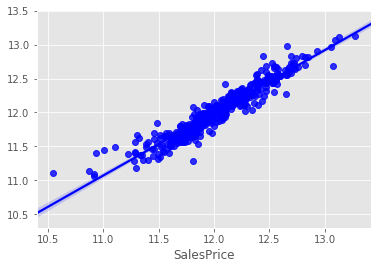

In [195]:
xg_reg = xgb.XGBRegressor(objective="reg:linear", max_depth=5,seed=123,gamma=0.0001,learning_rate=0.1)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
sqrt(mean_squared_error(y_test, preds))


In [196]:

y_xg = xg_reg.predict(tf)

KeyboardInterrupt: 

## Gradient Boosting 


In [203]:
range(5,10,1)

range(5, 10)

In [ ]:
from sklearn import ensemble
from sklearn.utils import shuffle


params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 5,'min_samples_leaf':5,
          'learning_rate': 0.05, 'loss': 'ls', 'max_features':'sqrt'}
clf = ensemble.GradientBoostingRegressor(**params)
#‘ls’, ‘lad’, ‘huber’, ‘quantile’
clf.fit(X_train, y_train)
mse = sqrt(mean_squared_error(y_test, clf.predict(X_test)))
print("MSE: %.4f" % mse)


In [ ]:
y_gdb = clf.predict(tf)

In [ ]:
gdb_dict={}
for md in [3,4,5]:
    for lr in [0.03,0.04,0.05,0.06]:
        for ne in [100,200,300]:
            
            gdb = ensemble.GradientBoostingRegressor(n_estimators= ne, max_depth= md, 
                                                     learning_rate= lr, loss= 'ls')
            gdb.fit(X_train, y_train)
            preds = gdb.predict(X_test)
            gdb_dict[(md,lr,ne)]=sqrt(mean_squared_error(y_test, preds))
            print(md,lr,ne,gdb.score(X_train, y_train),sqrt(mean_squared_error(y_test, preds)))


In [112]:
import h2o

In [307]:
from stacking import stacking_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [308]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

In [309]:
models = [
   
    ElasticNet(random_state=0,alpha = 0.00141724848112,l1_ratio=0.5),
    

    RandomForestRegressor(random_state=0,n_estimators=70, max_depth=10, max_features ='auto'),
    

    ExtraTreesRegressor(random_state=0,n_estimators=70, max_depth=10, max_features ='auto'),
    

    
    GradientBoostingRegressor(random_state=0, learning_rate = 0.005, max_features='sqrt',
        min_samples_leaf=15, min_samples_split=10, 
        n_estimators=3000, max_depth=3),
    

    GradientBoostingRegressor(random_state = 0, learning_rate = 0.05, max_features='sqrt',
        min_samples_leaf=5, min_samples_split=5, 
        n_estimators = 1000, max_depth = 4),
    
    SVR(kernel='linear', C=1e0,gamma =0.01),
    
    
    xgb.XGBRegressor(objective="reg:linear", n_estimators=1000, seed=123,
                     max_depth=5,gamma=0.0001,learning_rate=0.1)
    ]

meta_model = LinearRegression(normalize=True)

In [310]:
X.index

RangeIndex(start=0, stop=1458, step=1)

In [311]:
index = range(1458,2917,1)
tf.index = index

#indexed_tf = tf.set_index(np.arange(1458,2917,1))
tf.index

RangeIndex(start=1458, stop=2917, step=1)

In [312]:
def checkNull(df):
    if not isinstance(df, pd.DataFrame):
        return("No dataframe find!")
    if df.isnull().sum().sum() != 0:
        byCol = df.isnull().sum()
        return(byCol[byCol!=0])
    else:
        return ("The dataframe is NA free. Contains {0} rows with {1} attributes".format(df.shape[0], df.shape[1]))

In [313]:
checkNull(X_test)

'The dataframe is NA free. Contains 438 rows with 220 attributes'

In [314]:
%%time
final_prediction = stacking_regression(models, meta_model, X_train= X, y_train=y, X_test= tf,
                               transform_target=None, transform_pred=None,metric=rmsle, verbose=1)

metric: [rmsle]

model 0: [ElasticNet]
    ----
    MEAN:   [0.00979429]

model 1: [RandomForestRegressor]
    ----
    MEAN:   [0.01199822]

model 2: [ExtraTreesRegressor]
    ----
    MEAN:   [0.01127961]

model 3: [GradientBoostingRegressor]
    ----
    MEAN:   [0.01010118]

model 4: [GradientBoostingRegressor]
    ----
    MEAN:   [0.01024790]

model 5: [SVR]
    ----
    MEAN:   [0.01062520]

model 6: [XGBRegressor]
    ----
    MEAN:   [0.01033788]

CPU times: user 34.6 s, sys: 284 ms, total: 34.9 s
Wall time: 35 s


In [126]:
final_prediction

array([ 11.69405026,  11.98150216,  12.13651647, ...,  12.03174368,
        11.64778281,  12.33681411])

In [127]:
sub_prediction = np.expm1(final_prediction)-1

In [128]:
sub_prediction

array([ 119854.47424764,  159769.85344293,  186559.54648671, ...,
        168002.10304172,  114435.35210463,  227932.6200647 ])

## Final Submission 


In [129]:
sub = pd.DataFrame(sub_prediction)
sub.to_csv("submission2.csv")

## The begining of some EDA

Text(0.5,1,'House available for Sale group by Month')

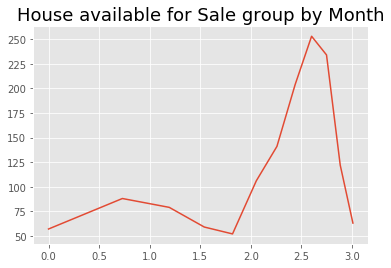

In [6]:
mean_TimeSold = df.groupby(['YrSold','MoSold'])[['SalesPrice']].mean()
std_TimeSold = df.groupby(['YrSold','MoSold'])[['SalesPrice']].std()
mean_MoSold =df.groupby('MoSold')[['SalesPrice']].mean()
df['MoSold'].value_counts().sort_index().plot()
plt.title('House available for Sale group by Month', fontsize=18)

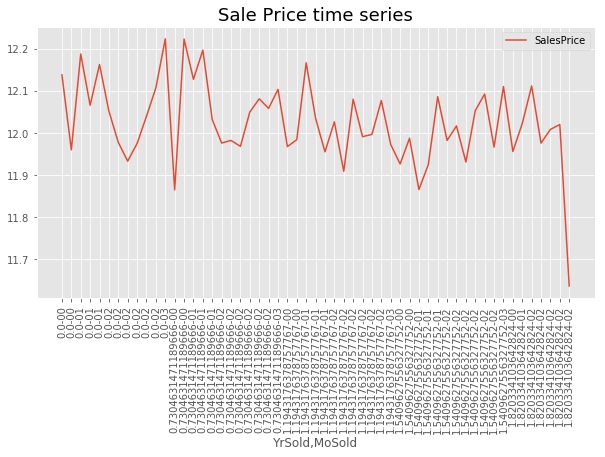

In [9]:
#plt.figure(figsize=(20,17))
#rcParams['figure.figsize'] = 10, 5
plot1 = mean_TimeSold.plot()
plot1.set_xticks(range(len(mean_TimeSold)));
plot1.set_xticklabels(["%s-%02d" % item for item in mean_TimeSold.index.tolist()], rotation=90)
plt.title('Sale Price time series', fontsize=18)
plt.show()

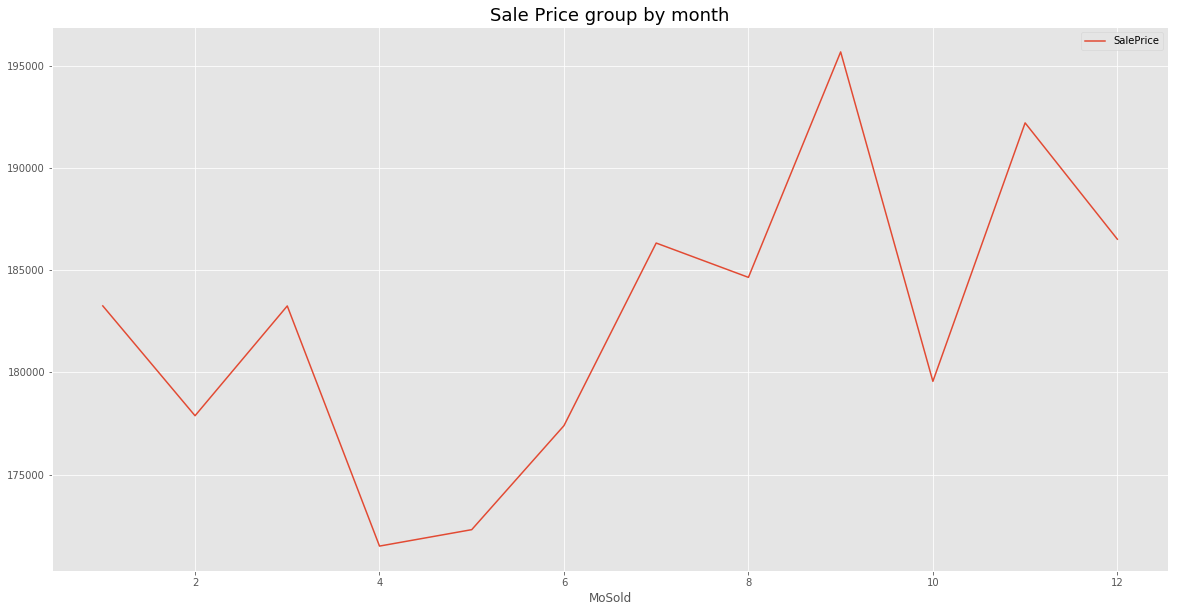

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plot2 = mean_MoSold.plot()
plt.title('Sale Price group by month', fontsize=18)

plt.show()

In [44]:
mean_MoSold

,SalePrice
MoSold,
1,183256.258621
2,177882.000000
3,183253.924528
4,171503.262411
5,172307.269608
6,177395.735178
7,186331.192308
8,184651.827869
9,195683.206349


In [45]:
 df[df.columns[(df.dtypes =='float64')|(df.dtypes =='int64')]].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleperArea
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,121.929825
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,143.819334
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,125.139978
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,81.537566
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,113.739763


In [46]:


X = df[["LotArea","YearBuilt"]] ## X usually means our input variables (or independent variables)
y = df["SalePrice"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     373.9
Date:                Thu, 01 Mar 2018   Prob (F-statistic):          8.54e-132
Time:                        13:38:45   Log-Likelihood:                -18242.
No. Observations:                1460   AIC:                         3.649e+04
Df Residuals:                    1457   BIC:                         3.651e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.533e+06    1.1e+05    -22.935      0.000   -2.75e+06   -2.32e+06
LotArea        2.0412      0.170     12.041      0.000       1.709       2.374
YearBuilt   1365.7762     56.022     24.379      0.000    1255.883    1475.669
==============================================================================
Omnibus:                      741.084   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7175.267
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      12.969   Cond. No.                     9.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

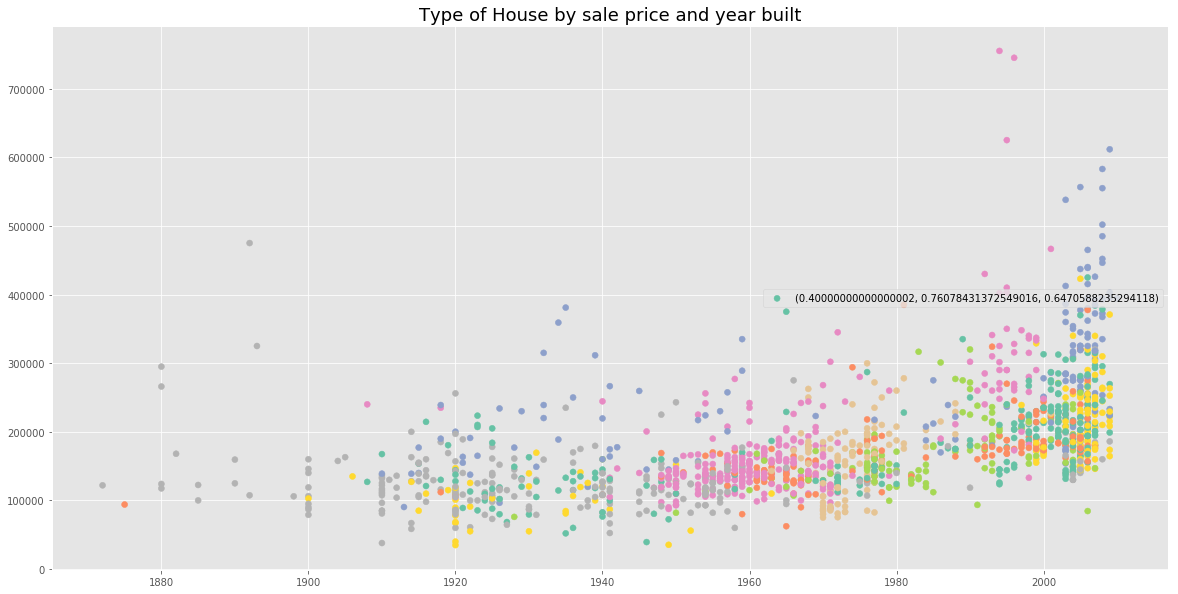

In [47]:
color_labels = df['Neighborhood'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))
plt.scatter(df['YearBuilt'], df['SalePrice'], c=df['Neighborhood'].map(color_map))
plt.title('Type of House by sale price and year built', fontsize=18)
plt.legend(rgb_values,loc='right')